# Total trip and route information to analyze GTFS data completeness

### Overview
This notebook contains codes to analyze the daily trips and routes count over the timeframe for which the GTFS dataset is applicable. This can be useful in identifying daily and weekly patterns in the dataset and help in making informed decisions regarding the selection of dates for generating the transit schedule tables.

### Import reqired libraries

In [ ]:
import sys
from pathlib import Path
import json

import pandas as pd
import gtfs_kit as gk
import itertools
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.dates as mdates

import warnings
warnings.filterwarnings("ignore")

### Mandatory user inputs for GTFS processing

In [67]:
#setting GTFS data directory path for loading
DIR = Path('..')
sys.path.append(str(DIR))
DATA_DIR = DIR/'gtfs_data/' #GTFS datasets to be processed must be downloaded or stored here.

#loading GTFS data and list the feed components. You may edit the path variable depending upon where the GTFS dataset is stored.
path = DATA_DIR/'gtfs-openov-nl.zip'
gk.list_feed(path)

#Setting GTFS data details. REGION_NAME attribute is the region covered by the available GTFS dataset. For the openov dataset, it is the Netherlands.
REGION_NAME = 'netherlands'

### Generate plots of daily total trips and routes to identify patterns

In [68]:
#load calender dates in the GTFS dataset
calendar_dates = pd.read_csv(DIR/'gtfs_data/{}/calendar_dates.txt'.format(REGION_NAME), low_memory=False)
calendar_dates.head()

,service_id,date,exception_type
0,1,20200120,1
1,2,20200120,1
2,2,20200210,1
3,3,20200120,1
4,3,20200203,1


In [69]:
#load and subset trips file
trips = pd.read_csv(DIR/'gtfs_data/{}/trips.txt'.format(REGION_NAME), low_memory=False)
trips = trips[['route_id', 'service_id', 'trip_id', 'shape_id', 'direction_id']]

#create an empty pandas dataframe to store transit statistics such as daily trips and routes
transit_stats = pd.DataFrame(columns = ['date', 'trips', 'routes'])
transit_stats['date'] = calendar_dates.date.unique()
transit_stats.head()

,date,trips,routes
0,20200120,NaN,NaN
1,20200210,NaN,NaN
2,20200203,NaN,NaN
3,20200217,NaN,NaN
4,20200224,NaN,NaN


In [70]:
#Calculate the total number of daily trips and routes in thr GTFS dataset 
for i in range(0, transit_stats.shape[0]):
    #Subsetting services on the calendar date
    services_of_interest = calendar_dates.query('date == {}'.format(transit_stats.date[i])).service_id.values
    
    #Subsetting the trips for the date of interest
    trips_on_date = trips.loc[trips['service_id'].isin(services_of_interest)]
    
    transit_stats.trips[i] = trips_on_date.trip_id.nunique()
    transit_stats.routes[i] = trips_on_date.route_id.nunique()
    print("Successfully extracted stats for {}".format(transit_stats.date[i]))

Successfully extracted stats for 20200120
Successfully extracted stats for 20200210
Successfully extracted stats for 20200203
Successfully extracted stats for 20200217
Successfully extracted stats for 20200224
Successfully extracted stats for 20200302
Successfully extracted stats for 20200309
Successfully extracted stats for 20200316
Successfully extracted stats for 20200323
Successfully extracted stats for 20200330
Successfully extracted stats for 20200406
Successfully extracted stats for 20200420
Successfully extracted stats for 20200504
Successfully extracted stats for 20200511
Successfully extracted stats for 20200518
Successfully extracted stats for 20200525
Successfully extracted stats for 20200608
Successfully extracted stats for 20200615
Successfully extracted stats for 20200622
Successfully extracted stats for 20200629
Successfully extracted stats for 20200706
Successfully extracted stats for 20200713
Successfully extracted stats for 20200720
Successfully extracted stats for 2

In [71]:
transit_stats['date'] = pd.to_datetime(transit_stats['date'].astype(str), format='%Y%m%d')
transit_stats = transit_stats.sort_values(by='date',ascending=True)
transit_stats.head(10)

,date,trips,routes
0,2020-01-20,122516,2451
195,2020-01-21,122542,2453
194,2020-01-22,122580,2452
193,2020-01-23,122804,2461
192,2020-01-24,123028,2500
191,2020-01-25,88105,1816
190,2020-01-26,70570,1570
24,2020-01-27,122523,2454
188,2020-01-28,122547,2454
187,2020-01-29,122575,2453


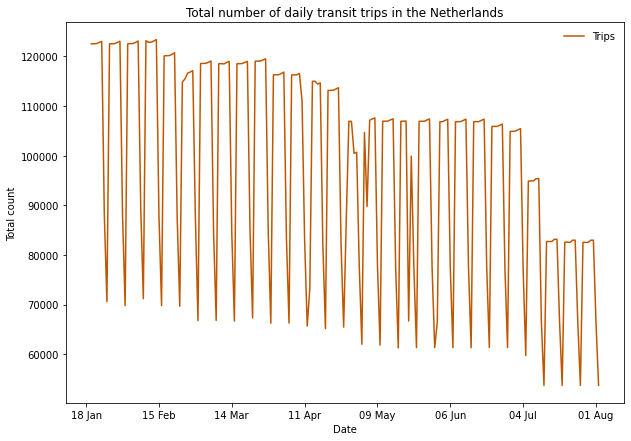

In [72]:
#plot the total number of daily trips

fig = plt.figure(figsize = (10, 7))
ax = plt.axes()

ax.plot(transit_stats.date, transit_stats.trips, color = '#bf5700', label = 'Trips')
#ax.plot(transit_stats.date, transit_stats.routes, color = '#bf5700', linestyle = '--', label = 'Routes')
ax.set_ylabel('Total count')
ax.set_xlabel('Date')
#ax.set_ylim([0, data['Dem_Actual'].max()])
#ax.set_xlim((pd.to_datetime('2021-01-28'), pd.to_datetime('2021-02-28')))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=28))
ax.title.set_text('Total number of daily transit trips in the Netherlands')
leg = ax.legend(loc='upper right')
leg.draw_frame(False)

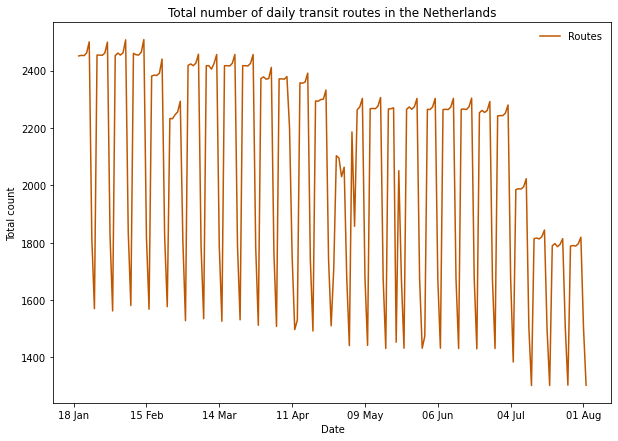

In [74]:
#plot the total number of daily routes

fig = plt.figure(figsize = (10, 7))
ax = plt.axes()

#ax.plot(transit_stats.date, transit_stats.trips, color = '#bf5700', label = 'Trips')
ax.plot(transit_stats.date, transit_stats.routes, color = '#bf5700', label = 'Routes')
ax.set_ylabel('Total count')
ax.set_xlabel('Date')
#ax.set_ylim([0, data['Dem_Actual'].max()])
#ax.set_xlim((pd.to_datetime('2021-01-28'), pd.to_datetime('2021-02-28')))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=28))
ax.title.set_text('Total number of daily transit routes in the Netherlands')
leg = ax.legend(loc='upper right')
leg.draw_frame(False)